In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [169]:
train = pd.read_csv('C:\\Users\\PC\\Desktop\\jupyter project\\Session 4 case study\\WA_Fn-UseC_-Telco-Customer-Churn.csv')



In [170]:
train.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [171]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [172]:
train['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [173]:
train.duplicated().sum()

0

In [174]:
dict={'Yes':1, 'No':0}
train['Churn'].replace(dict, inplace=True)

In [175]:
train.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [176]:
train['TotalCharges'] = pd.to_numeric(train['TotalCharges'], errors='coerce')


 Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 

In [177]:
train['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [178]:
dict={'Yes':1, 'No':0}
train['Partner'].replace(dict, inplace=True)

In [179]:
train['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [180]:
dict={'Yes':1, 'No':0}
train['Dependents'].replace(dict, inplace=True)

In [181]:
train['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [182]:
dict={'Yes':1, 'No':0}
train['PhoneService'].replace(dict, inplace=True)

In [183]:
train['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [184]:
dict={'Yes':1, 'No':0}
train['PaperlessBilling'].replace(dict, inplace=True)

# Univariate Analysis

<AxesSubplot:>

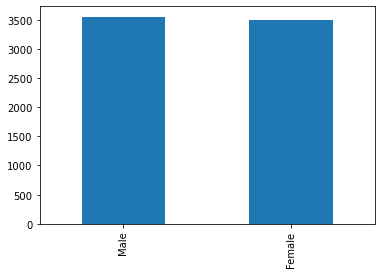

In [185]:
train['gender'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='gender'>

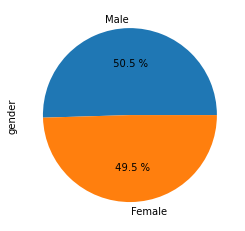

In [186]:
train['gender'].value_counts().plot(kind='pie', autopct ='% 1.1f %%')

<AxesSubplot:>

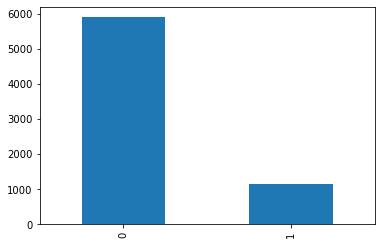

In [187]:
train['SeniorCitizen'].value_counts().plot(kind='bar')

<AxesSubplot:>

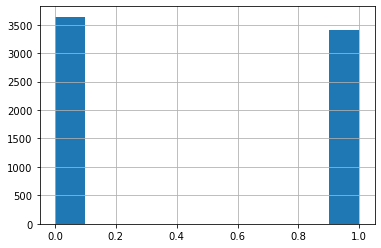

In [188]:
train['Partner'].hist()

<AxesSubplot:>

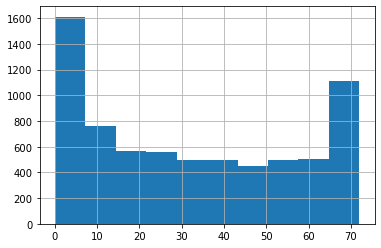

In [189]:
train['tenure'].hist()

<AxesSubplot:>

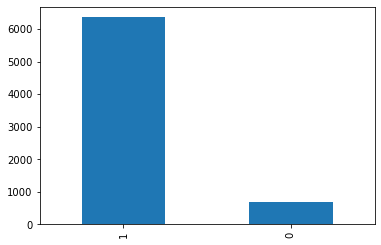

In [190]:
train['PhoneService'].value_counts().plot(kind='bar')

# Bivariate Analysis

In [191]:
train.corr()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.156530,0.220173,0.102411,0.150889
Partner,0.016479,1.000000,0.452676,0.379697,0.017706,-0.014877,0.096848,0.319072,-0.150448
Dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.111377,-0.113890,0.064653,-0.164221
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.006152,0.247900,0.825880,-0.352229
PhoneService,0.008576,0.017706,-0.001762,0.008448,1.000000,0.016505,0.247398,0.113008,0.011942
PaperlessBilling,0.156530,-0.014877,-0.111377,0.006152,0.016505,1.000000,0.352150,0.157830,0.191825
MonthlyCharges,0.220173,0.096848,-0.113890,0.247900,0.247398,0.352150,1.000000,0.651065,0.193356
TotalCharges,0.102411,0.319072,0.064653,0.825880,0.113008,0.157830,0.651065,1.000000,-0.199484
Churn,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193356,-0.199484,1.000000


# Conditional Probability

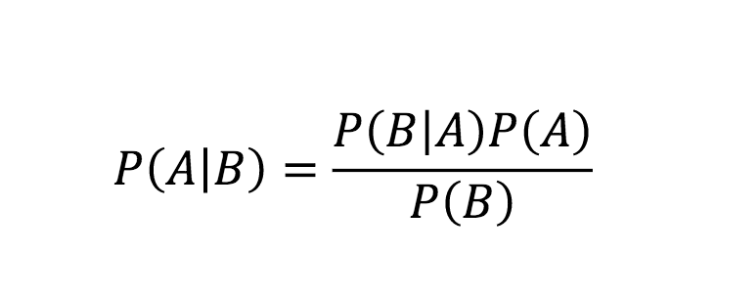

- what is the probability of churn given that he/she is a Male/Female?

In [192]:
train.groupby('gender').Churn.value_counts()


gender  Churn
Female  0        2549
        1         939
Male    0        2625
        1         930
Name: Churn, dtype: int64

In [194]:
train.query('gender =="Male"').Churn.mean()

0.2616033755274262

In [195]:
train.query('gender =="Female"').Churn.mean()

0.26920871559633025

The probability that the customer will leave given he is a Female is higher than that of being a Male.

Does internetService affect the probablility of Churn?

In [197]:
train['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [199]:
train.query('InternetService =="DSL"').Churn.mean()

0.1895910780669145

In [201]:
train.query('InternetService =="Fiber optic"').Churn.mean()

0.4189276485788114

In [202]:
train.query('InternetService =="No"').Churn.mean()

0.07404980340760157

All those who leave the company have a DSL internet service.

In [203]:
len(train[train['InternetService'] == 'DSL']) / train.shape[0]

0.34374556297032516

In [204]:
len(train[train['InternetService'] == 'Fiber optic']) / train.shape[0]


0.4395854039471816

# Confidence Interval for total Charges

In [219]:
churn_red = train.sample(200)

In [222]:
churn_red[churn_red['Churn'] == False]['TotalCharges'].mean()

2539.9049668874172

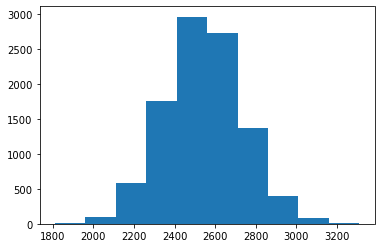

In [220]:
boot_means = []
for _ in range(10000):
    bootsamp =churn_red.sample(200, replace = True)
    boot_mean = bootsamp[bootsamp['Churn'] == False]['TotalCharges'].mean()
    boot_means.append(boot_mean)
    
plt.hist(boot_means);

In [221]:
np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)

(2172.866263079469, 2922.6942256509565)

In [223]:
churn_red[churn_red['Churn'] == True]['TotalCharges'].mean()

1676.657142857143

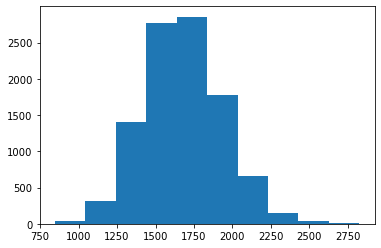

In [224]:
boot_means = []
for _ in range(10000):
    bootsamp =churn_red.sample(200, replace = True)
    boot_mean = bootsamp[bootsamp['Churn'] == True]['TotalCharges'].mean()
    boot_means.append(boot_mean)
    
plt.hist(boot_means);

In [225]:
np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)

(1212.1881510416672, 2205.0050683890577)

In [227]:
diff = []
for _ in range(10000):
    bootsample = churn_red.sample(200, replace=True)
    mean_nocoff = bootsample[bootsample['Churn'] == False]['TotalCharges'].mean()
    mean_coff = bootsample[bootsample['Churn'] == True]['TotalCharges'].mean()
    diff.append(mean_nocoff - mean_coff)

np.percentile(diff, 2.5), np.percentile(diff, 97.5)

(228.67335426889557, 1466.1172064393952)

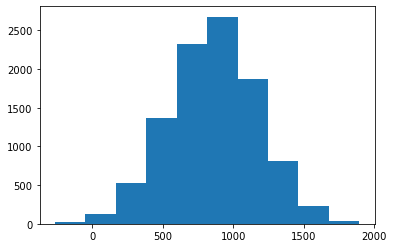

In [232]:
plt.hist(diff);

In [231]:
import statsmodels.stats.api as sms

X1 = churn_red[churn_red['Churn'] == False]['TotalCharges'] 
X2 = churn_red[churn_red['Churn'] == True]['TotalCharges']

cm = sms.CompareMeans(sms.DescrStatsW(X1), sms.DescrStatsW(X2))
cm.tconfint_diff(usevar='unequal')

(233.6471268031611, 1492.8485212573878)